In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def earth_geocentric_radius(phi: float):
    # WGS-84 Earth's equatorial radius, semi-major axis
    a = 6378137.0
    # WGS-84 Earth's polar radius, semi-minor axis
    b = 6356752.3
    acp = a * math.cos(phi)
    bsp = b * math.sin(phi)
    aacp = a * acp
    bbsp = b * bsp    
    return math.sqrt((aacp * aacp + bbsp * bbsp) / (acp * acp + bsp * bsp))

In [3]:
earth_geocentric_radius(0)

6378137.0

In [4]:
earth_geocentric_radius(math.pi / 2)

6356752.3

In [5]:
earth_geocentric_radius(math.pi / 4)

6367489.536800727

In [6]:
v = np.vectorize(earth_geocentric_radius)

In [7]:
height = 720
width = 2 * height
res = 180 / height
res05 = 0.5 * res
y1 = -90 + res05
y2 = +90 - res05

In [8]:
y1, y2, res

(-89.875, 89.875, 0.25)

In [9]:
y = np.linspace(y1, y2, height)
r = v(math.pi * y / 180)

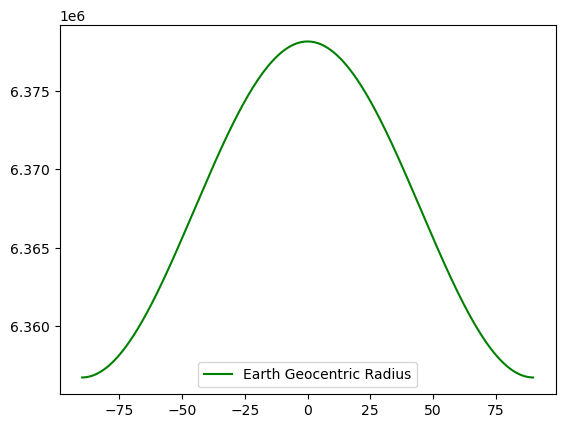

In [10]:
plt.plot(y, r, color='green', label='Earth Geocentric Radius')
plt.legend()

In [11]:
w = 2 * math.pi * r * np.cos(math.pi * y / 180) / width
h = 2 * math.pi * r / width

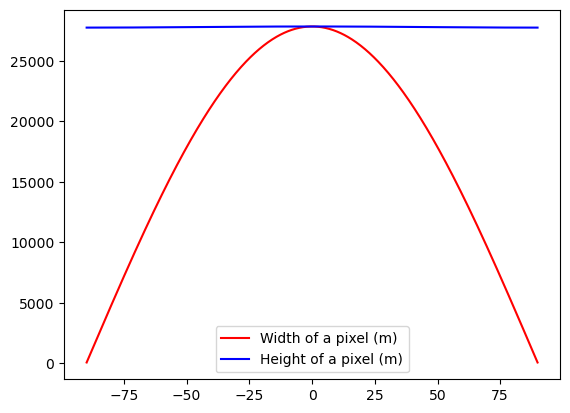

In [12]:
plt.plot(y, w, color='red', label='Width of a pixel (m)')
plt.plot(y, h, color='blue', label='Height of a pixel (m)')
plt.legend()

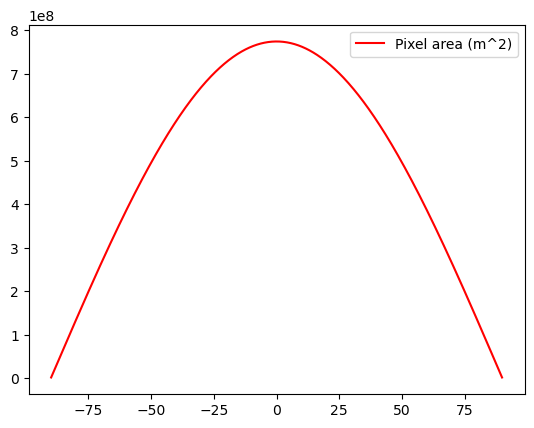

In [13]:
plt.plot(y, w * h, color='red', label='Pixel area (m^2)')
plt.legend()